In [27]:
import os
import geopandas as gp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from pylab import *
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
plt.rcParams['axes.unicode_minus']=False#负号
plt.rcParams['font.sans-serif']=['Arial']###############
plt.rcParams['font.size'] = '7' # 设置字体大小 = '16' # 设置字体大小
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

In [3]:
# latlon_1degree_SJ_last=path+'/global_grid.shp'
version='v16_250104'
output_dir = os.path.join(r'J:\lakemapping\postprocess',version)
excel_dir=os.path.join(output_dir,f'stastics_excel')

# gdb=os.path.join(output_dir,f'7_correct_temp_file.gdb')
gdb=os.path.join(output_dir,f'8_compare.gdb')
fig_path=r'D:\lakemapping\10_paper_writting\figure\v6_250321'
os.makedirs(fig_path,exist_ok=True)

global_diss=r'D:\lakemapping\0_auxiliary_data\World_Continents\world_vector\World_continents_dissolve.shp'
Arid_Region=r'D:\lakemapping\0_auxiliary_data\AI\Global-AI_ET0_annual_v3\Global-AI_ET0_v3_annual\Global_AI_Reclassify_Clip_simple.shp'

color_list=['#B8DBB3','#72B063','#E29135','#94C6CD','#719AAC','#4A5F7E','#9e003a']#浅绿，深绿，橙色，浅蓝，中蓝，深蓝,红
label_list=['0.005~0.01 ${km^2}$','0.01~0.03 ${km^2}$','0.03~0.1 ${km^2}$','0.1~1 ${km^2}$','>1 ${km^2}$']
sub_fig_name=['a','b','c','d','e','f']
red_color_list=['#311d3f','#522546','#88304e']
# lake_category_bins=[0.005,0.01,1,100,10000,1000000]
# lake_category_labels=['Tiny','Small','Medium','Large','Super large']

lake_category_bins=[0.005,0.01,1,100,10000,1000000]
lake_category_labels=['1','3','10','100']

In [4]:
latlon_1degree_SJ_last_data=gp.read_file(gdb,layer='GLAKESplus_PLD_SJ')
latlon_1degree_SJ_last_data

,Join_Count,TARGET_FID,pld_c_gt10,hu_c_gt10,Lat_down,Lon_left,hu_c1,hu_c10,pld_a10,pld_c10,hu_a1,hu_a10,hu_a_gt10,pld_a_gt10,Shape_Length,Shape_Area,diff_a10,diff_c10,geometry
0,0,1,0,0,-56,-72,1.0,NaN,NaN,0,0.008277,NaN,NaN,NaN,4.0,1.0,NaN,NaN,"MULTIPOLYGON (((-72.00000 -56.00000, -72.00000..."
1,9,2,8,36,-56,-71,33.0,115.0,0.173700,6,0.238086,4.052528,14.277526,6.086903,4.0,1.0,3.878828,109.0,"MULTIPOLYGON (((-71.00000 -56.00000, -71.00000..."
2,46,3,46,102,-56,-70,98.0,232.0,1.133100,20,0.697698,8.579400,63.200616,21.307381,4.0,1.0,7.446300,212.0,"MULTIPOLYGON (((-70.00000 -56.00000, -70.00000..."
3,53,4,52,60,-56,-69,137.0,332.0,6.791431,156,0.973344,11.462034,19.648929,19.745113,4.0,1.0,4.670603,176.0,"MULTIPOLYGON (((-69.00000 -56.00000, -69.00000..."
4,102,5,101,91,-56,-68,124.0,306.0,12.858215,351,0.889901,11.513529,90.765876,89.739736,4.0,1.0,-1.344686,-45.0,"MULTIPOLYGON (((-68.00000 -56.00000, -68.00000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18044,0,18045,0,0,83,-29,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,"MULTIPOLYGON (((-29.00000 83.00000, -29.00000 ..."
18045,0,18046,0,0,83,-28,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,"MULTIPOLYGON (((-28.00000 83.00000, -28.00000 ..."
18046,0,18047,0,0,83,-27,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,"MULTIPOLYGON (((-27.00000 83.00000, -27.00000 ..."
18047,0,18048,0,0,83,-26,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,"MULTIPOLYGON (((-26.00000 83.00000, -26.00000 ..."


In [5]:
Lat_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lat_down']).sum().reset_index()
latitude= Lat_data['Lat_down'].values
Lat_data

,Lat_down,Join_Count,TARGET_FID,pld_c_gt10,hu_c_gt10,Lon_left,hu_c1,hu_c10,pld_a10,pld_c10,hu_a1,hu_a10,hu_a_gt10,pld_a_gt10,Shape_Length,Shape_Area,diff_a10,diff_c10
0,-56,225,21,222,300,-417,403.0,1015.0,21.954546,566,2.872040,36.544138,192.106517,142.397033,24.0,6.0,14.589592,449.0
1,-55,300,255,291,757,-748,1260.0,2449.0,26.986637,832,9.081764,82.840242,1185.953473,1015.860453,68.0,17.0,21.139070,1617.0
2,-54,525,252,513,789,-610,1019.0,2188.0,31.083497,841,7.240720,75.360087,600.914627,2216.328796,36.0,9.0,44.244542,1347.0
3,-53,544,507,529,683,-653,1109.0,2217.0,35.352727,973,7.924867,71.983689,705.680420,2847.167306,52.0,13.0,36.646261,1245.0
4,-52,974,676,946,1078,-880,1014.0,2558.0,58.214100,1531,7.231826,91.224367,1121.616050,1417.902655,52.0,13.0,32.977921,1027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,79,0,1592595,117,0,-1776,0.0,0.0,0.000000,567,0.000000,0.000000,0.000000,0.000000,360.0,90.0,0.000000,0.0
136,80,0,1903958,163,0,-910,0.0,0.0,0.000000,688,0.000000,0.000000,0.000000,0.000000,428.0,107.0,0.000000,0.0
137,81,0,1753857,103,0,-2923,0.0,0.0,0.000000,440,0.000000,0.000000,0.000000,0.000000,392.0,98.0,0.000000,0.0
138,82,0,1276651,0,0,-3863,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,284.0,71.0,0.000000,0.0


In [6]:
Lon_data = latlon_1degree_SJ_last_data.drop(columns='geometry').groupby(['Lon_left']).sum().reset_index()
longitude= Lon_data['Lon_left'].values
Lon_data

,Lon_left,Join_Count,TARGET_FID,pld_c_gt10,hu_c_gt10,Lat_down,hu_c1,hu_c10,pld_a10,pld_c10,hu_a1,hu_a10,hu_a_gt10,pld_a_gt10,Shape_Length,Shape_Area,diff_a10,diff_c10
0,-180,388,108242,382,435,441,849.0,1745.0,51.686941,1525,5.993815,57.420836,182.914078,192.860538,32.0,8.0,5.547300,220.0
1,-179,790,113782,772,835,386,1201.0,2894.0,83.541303,2569,8.709065,94.565613,328.103681,295.782270,44.0,11.0,10.958315,325.0
2,-178,613,97659,592,620,386,1266.0,2989.0,85.464955,2580,9.133267,97.906365,256.250100,204.020073,32.0,8.0,12.415414,409.0
3,-177,653,91281,641,710,266,1154.0,3050.0,93.568010,2755,8.358720,102.741397,496.196301,444.126081,40.0,10.0,8.352940,295.0
4,-176,350,88901,338,396,307,929.0,2044.0,59.173979,1844,6.619515,65.148545,189.666652,402.081395,36.0,9.0,5.808215,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,175,1360,154836,1337,1494,398,3095.0,6421.0,173.588831,5106,22.198782,207.018416,1430.269140,1331.091543,68.0,17.0,33.367746,1315.0
356,176,1500,134016,1445,1637,302,3261.0,6944.0,193.294463,5666,23.328277,226.547628,1120.840771,1953.873349,64.0,16.0,33.242204,1278.0
357,177,1522,158722,1496,1652,429,3455.0,7126.0,187.884731,5610,24.598116,227.927860,1157.916756,1507.437231,72.0,18.0,39.563505,1516.0
358,178,815,191917,802,894,559,2504.0,4963.0,126.815972,4025,17.971727,152.093258,767.959305,822.360206,80.0,20.0,24.801721,938.0


In [7]:
Lon_data['hu_a1'].max()
Lon_data['hu_a10'].max()

2592.3837876739544

In [8]:
def add_background_fig(ax,ax_legend,data,terrain_map,column,legend_kwds,norm,grid_flag=True):
    map1 = Basemap( llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,ax=ax)
    map1.readshapefile(global_diss[:-4],'global_diss',drawbounds=True,color='k',linewidth=0.4)
    
    tu=data.plot(
            ax=ax,
            cax=ax_legend,
            zorder=1,
            legend=True,  # 图例
            column=column,  # 分级设色字段#picover0\pia_0
            cmap=terrain_map,#terrain_map,  # 渐变色带的名称#Set2  #seismic
            legend_kwds=legend_kwds,
            norm=norm
            )
    
def draw_line(ax,xlim,xticks,ylim,yticks,line_color,label,x,y):
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.plot(x, y, color=line_color, linestyle = "-",linewidth = 0.8,label=label)
    
    
def custom_ticks(x, pos):
        if x == 0:
            return "0"
        poww=int(math.log10(x))
        return f"10$^{poww}$"

In [9]:
columns=['diff_a10','diff_c10']
grid_labels=[[0,0,1,0],[0,0,0,1]]
titles=['The area difference (km$^2$) of lakes \nwith sizes between 0.01 and 0.1 km$^2$','The count difference of lakes \nwith sizes between 0.01 and 0.1 km$^2$']

RdYlBu_r = plt.colormaps.get_cmap('RdBu_r')#
newcolors = RdYlBu_r(np.linspace(0,1, 256))
terrain_map = ListedColormap(newcolors)
    
b1=40
b2=1200
norms=[colors.Normalize(vmin=-b1, vmax=b1),colors.Normalize(vmin=-b2, vmax=b2)]
ticks=[np.arange(-b1,b1+1,10),np.arange(-b2,b2+1,400)]

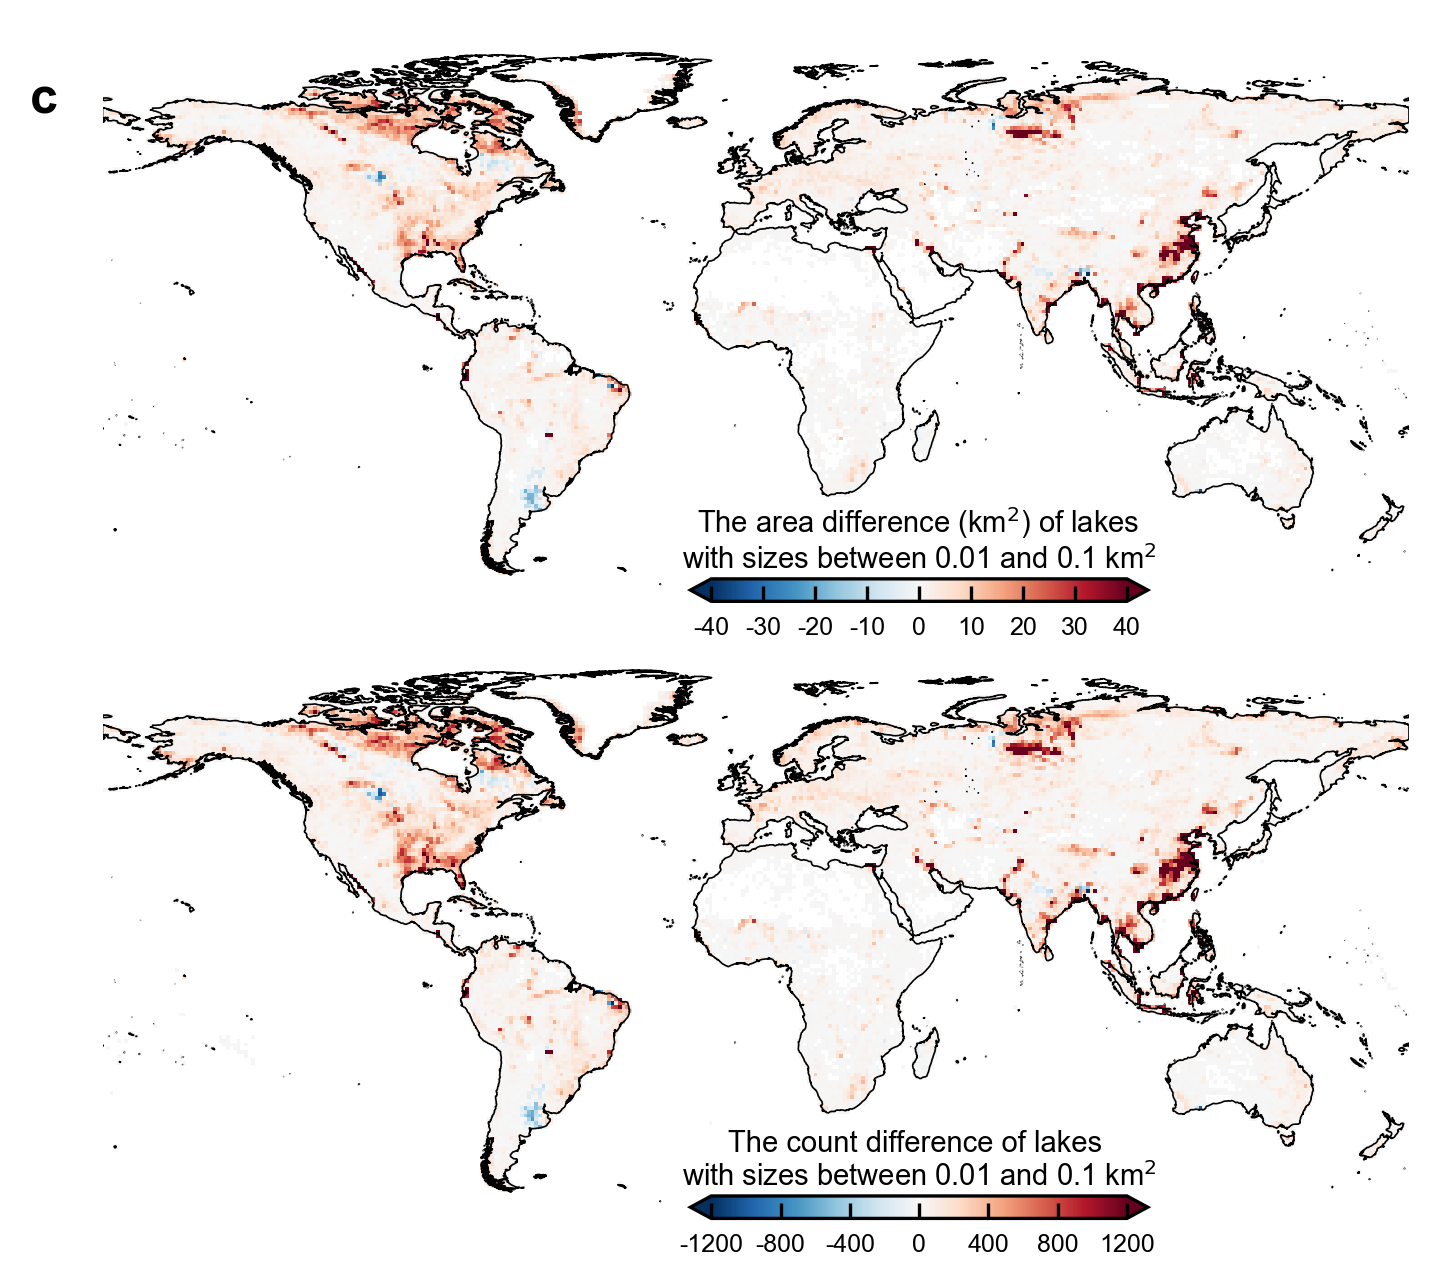

In [28]:
savepic=os.path.join(fig_path,'Figure9 c.eps')
fig=plt.figure(figsize=(6,5.1),dpi=300)
gs = gridspec.GridSpec(2,1,height_ratios=[1,1],hspace =0.1)
ax2=plt.subplot(gs[0, 0],)
### b.格网面积
ax22 =ax2.inset_axes((0.45, -0.02,0.35,0.04)) 
ax2.text(-200,65,sub_fig_name[2],fontsize=12,ha='left',va='bottom',weight='bold')
for spine in ax2.spines.values():
    spine.set_visible(False)
legend_kwds={'orientation': "horizontal",'extend':'both','ticks': ticks[0]}
add_background_fig(ax2,ax22,latlon_1degree_SJ_last_data,terrain_map,columns[0],legend_kwds,norms[0])
ax22.text(0,1.2, titles[0],bbox=dict(facecolor='white',edgecolor='White',pad=0),ha='center',va='bottom')#
for label in ax22.get_xticklabels():
        label.set_fontsize(6)
        
### b.格网面积
ax4=plt.subplot(gs[1, 0],)
for spine in ax4.spines.values():
        spine.set_visible(False)
legend_kwds={'orientation': "horizontal",'extend':'both','ticks': ticks[1]}
ax44 = ax4.inset_axes((0.45, -0.02,0.35,0.04)) 
add_background_fig(ax4,ax44,latlon_1degree_SJ_last_data,terrain_map,columns[1],legend_kwds,norms[1])
ax44.text(0,1.2, titles[1],bbox=dict(facecolor='white',edgecolor='White',pad=0),ha='center',va='bottom')
for label in ax44.get_xticklabels():
        label.set_fontsize(6)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

In [11]:
hu_color=color_list[-1]
alpha=[0.7,0.5,0.2]
color_gt10='#363636'

In [33]:
### a.经度面积
label=['≥ 0.1 km$^2$','0.01~0.1 km$^2$','< 0.01 km$^2$']
savepic=os.path.join(fig_path,'Figure9 a.eps')
fig=plt.figure(figsize=(6,1),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,1,height_ratios=[1,1],hspace =0)

ax1=plt.subplot(gs[0, 0],)
ax1.text(-290,2.8,sub_fig_name[0],fontsize=12,ha='left',weight='bold')

s=3
hu_a_lt1=Lon_data['hu_a1'].values/(10.0**s)
hu_a_bt1_10=Lon_data['hu_a10'].values/(10.0**s)
pld_a_bt1_10=Lon_data['pld_a10'].values/(10.0**s)

s1=ax1.bar(longitude+0.5,bottom=hu_a_bt1_10,height=hu_a_lt1, color=hu_color,width=1,alpha=alpha[2],label=label[2])
s2=ax1.bar(longitude+0.5,hu_a_bt1_10, color=hu_color,width=1,alpha=alpha[1],label=label[1])
# ax1.bar(longitude+0.5,pld_a_bt1_10,color='#719AAC',width=1,alpha=alpha[1],label=label[1])
s3,=ax1.plot(longitude+0.5,pld_a_bt1_10,color=red_color_list[0],linewidth=0.5,label=' ')#label[1]
plt.tick_params(bottom=True, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
ax1.set_ylim(0,3)
ax1.set_xlim(-180,180)
ax1.text(-177,2,f'×10$^{s}$',ha='left',va='bottom',color=hu_color,fontsize=6)
ax1.set_yticks(range(0,4))
ax1.text(177,2,'area < 0.1 km$^2$',ha='right',va='bottom',color=color_gt10)
ax11=plt.subplot(gs[1, 0],)
s=4
hu_a_gt10=Lon_data['hu_a_gt10'].values/(10.0**s)
pld_a_gt10=Lon_data['pld_a_gt10'].values/(10.0**s)
s4=ax11.bar(longitude+0.5,-hu_a_gt10, color=hu_color,width=1,alpha=alpha[0],label=label[0])
# ax11.bar(longitude+0.5,-pld_a_gt10,color=color_list[-1],width=1,alpha=alpha[0],label=label[0])
s5,=ax11.plot(longitude+0.5,-pld_a_gt10,color=red_color_list[1],linewidth=0.8,label=' ')
ax11.set_ylim(-6,0)
ax11.text(-200,0,'Area ($\mathregular{km^2}$)',rotation=90,va='center',color=hu_color)

for ax in [ax1,ax11]:
    ax.set_xlim(-180,180)
    ax.set_xticks(range(-180,181,60))
    ax.spines['left'].set_color(hu_color) 
    ax.tick_params(axis='x',width=0.5,length=2)
    ax.tick_params(axis='y',width=0.5,length=2,color=hu_color)
    for label in ax.get_yticklabels():
        label.set_color(hu_color)
        label.set_fontsize(6)
    for label in ax.get_xticklabels():
        label.set_fontsize(6)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

plt.tick_params(bottom=True, top=True, left=True, right=False )
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True, labelright=False)
series_hu=[s4,s2,s1]
series_pld=[s5,s3]
ax11.set_yticks(range(-6,0,2))
ax11.set_yticklabels([6,4,2])
ax1.text(-272,2.1,'Area')
ax1.text(-285,1.3,'PLD  GLAKESplus',fontsize=6)
ax11.set_xlabel('Longitude')
ax1.legend(handles=series_hu,title=None,loc=[-0.25,-0.8],frameon=False)
ax11.legend(loc=[1.02,0.1],frameon=False)
ax11.legend(handles=series_pld, title=None,labelspacing=0.83,loc=[-0.3,0.63],fontsize=6, frameon=False)
ax11.set_facecolor('#f4f4f4')
ax11.text(-177,-6,f'×10$^{s}$',ha='left',va='bottom', color=hu_color,fontsize=6)
ax11.text(177,-6,'area ≥ 0.1 km$^2$',ha='right',va='bottom',color=color_gt10)

with PdfPages(savepic.replace('eps','pdf')) as pdf:
    pdf.savefig(fig)

# # 保存为.ps格式
plt.savefig(savepic)
# plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
# plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ValueError: Error measuring \sffamily\fontsize{7.000000}{8.400000}\selectfont Area (\(\displaystyle \mathregular{km^2}\))
LaTeX Output:
! Undefined control sequence.
<argument> ... Area (\(\displaystyle \mathregular 
                                                  {km^2}\))
<*> ...rea (\(\displaystyle \mathregular{km^2}\))}
                                                  \typeout{\the\wd0,\the\ht0...

No pages of output.
Transcript written on texput.log.


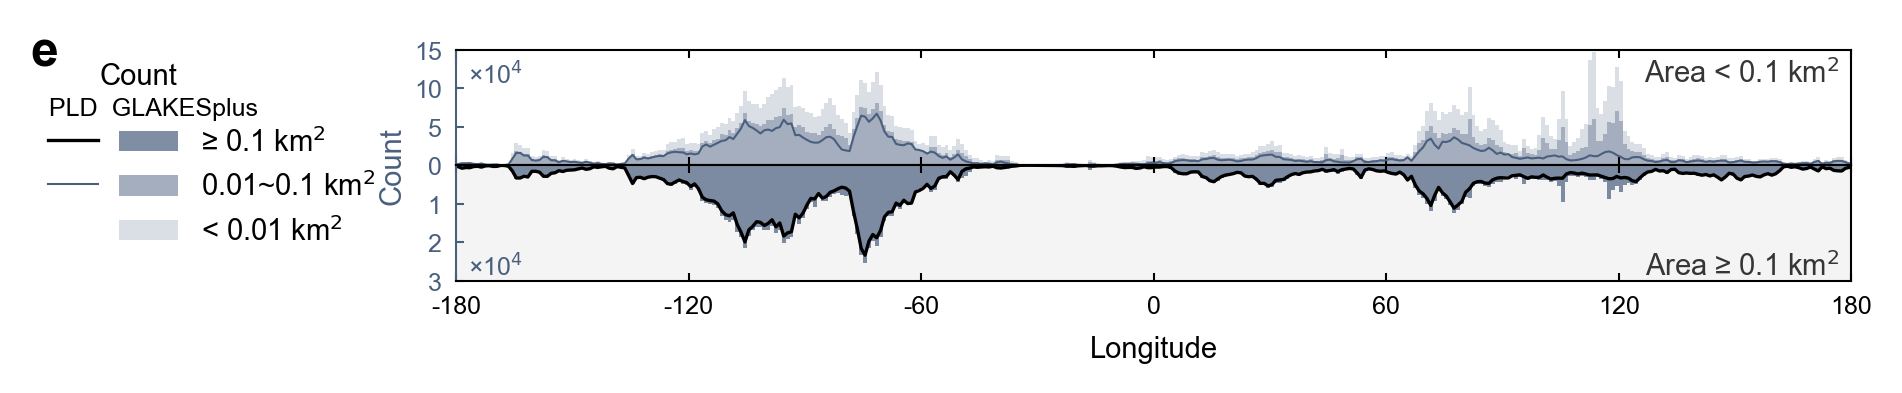

In [23]:
hu_c_color=color_list[-2]
label=['≥ 0.1 km$^2$','0.01~0.1 km$^2$','< 0.01 km$^2$']
savepic=os.path.join(fig_path,'Figure9 e.png')
fig=plt.figure(figsize=(6,1),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(2,1,height_ratios=[1,1],hspace =0)

ax1=plt.subplot(gs[0, 0],)
ax1.text(-290,13,sub_fig_name[4],fontsize=12,ha='left',weight='bold')

s=4
hu_a_lt1=Lon_data['hu_c1'].values/(10.0**s)
hu_a_bt1_10=Lon_data['hu_c10'].values/(10.0**s)
pld_a_bt1_10=Lon_data['pld_c10'].values/(10.0**s)

s1=ax1.bar(longitude+0.5,bottom=hu_a_bt1_10,height=hu_a_lt1, color=hu_c_color,width=1,alpha=alpha[2],label=label[2])
s2=ax1.bar(longitude+0.5,hu_a_bt1_10, color=hu_c_color,width=1,alpha=alpha[1],label=label[1])
# ax1.bar(longitude+0.5,pld_a_bt1_10,color='#719AAC',width=1,alpha=alpha[1],label=label[1])
s3,=ax1.plot(longitude+0.5,pld_a_bt1_10,color=color_list[-2],linewidth=0.5,label=' ')
plt.tick_params(bottom=True, top=True, left=True, right=False )
plt.tick_params(labelbottom=False,labeltop=False,labelleft=True, labelright=False)
ax1.set_ylim(0,15)
ax1.set_xlim(-180,180)
ax1.text(-177,10,f'×10$^{s}$',ha='left',va='bottom',color=hu_c_color,fontsize=6)
# ax1.set_ylabel('Count')
ax1.set_yticks(range(0,16,5))
ax1.text(177,10,'Area < 0.1 km$^2$',ha='right',va='bottom',color=color_gt10)
ax11=plt.subplot(gs[1, 0],)
s=4
hu_a_gt10=Lon_data['hu_c_gt10'].values/(10.0**s)
pld_a_gt10=Lon_data['pld_c_gt10'].values/(10.0**s)
s4=ax11.bar(longitude+0.5,-hu_a_gt10, color=hu_c_color,width=1,alpha=alpha[0],label=label[0])
# ax11.bar(longitude+0.5,-pld_a_gt10,color='#719AAC',width=1,alpha=alpha[0],label=label[0])
s5,=ax11.plot(longitude+0.5,-pld_a_gt10,color='k',linewidth=0.8,label=' ')
ax11.set_ylim(-3,0)
for ax in [ax1,ax11]:
    ax.set_xlim(-180,180)
    ax.set_xticks(range(-180,181,60))
    ax.spines['left'].set_color(hu_c_color) 
    ax.tick_params(axis='x',width=0.5,length=2)
    ax.tick_params(axis='y',width=0.5,length=2,color=hu_c_color)
    for label in ax.get_yticklabels():
        label.set_color(hu_c_color)
        label.set_fontsize(6)
    for label in ax.get_xticklabels():
        label.set_fontsize(6)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

plt.tick_params(bottom=True, top=True, left=True, right=False )
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True, labelright=False)

series_hu=[s4,s2,s1]
series_pld=[s5,s3]

ax11.set_yticks(range(-3,0,1))
ax11.set_yticklabels([3,2,1])
ax1.text(-272,10.5,'Count')
ax1.text(-285,6.5,'PLD  GLAKESplus',fontsize=6)
ax1.legend(handles=series_hu,title=None,loc=[-0.25,-0.8],frameon=False)
# ax11.legend(loc=[1.02,0.1],frameon=False)
ax11.legend(handles=series_pld, title=None,labelspacing=0.84,loc=[-0.3,0.63],fontsize=6, frameon=False)
ax11.text(-177,-3,f'×10$^{s}$',ha='left',va='bottom', color=hu_c_color,fontsize=6)
ax11.text(-200,0,'Count',rotation=90,va='center',color=hu_c_color)
ax11.set_facecolor('#f4f4f4')
ax11.text(177,-3,'Area ≥ 0.1 km$^2$',ha='right',va='bottom',color=color_gt10)
ax11.set_xlabel('Longitude')
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

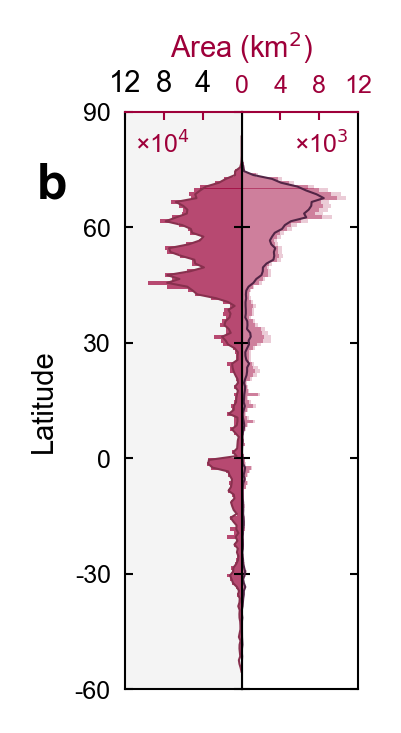

In [24]:
### c.纬度面积
label=['>0.1 km$^2$','0.01~0.1 km$^2$','0.005~0.01 km$^2$']
savepic=os.path.join(fig_path,'Figure9 b.png')
fig=plt.figure(figsize=(1,2.5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1],wspace =0)

ax1=plt.subplot(gs[0, 1],)
s=3
hu_a_lt1=Lat_data['hu_a1'].values/(10.0**s)
hu_a_bt1_10=Lat_data['hu_a10'].values/(10.0**s)
pld_a_bt1_10=Lat_data['pld_a10'].values/(10.0**s)

ax1.barh(latitude+0.5,left=hu_a_bt1_10,width=hu_a_lt1, color=hu_color,height=1,alpha=alpha[2],label=label[2])
ax1.barh(latitude+0.5,hu_a_bt1_10, color=hu_color,height=1,alpha=alpha[1],label=label[1])
# ax1.barh(latitude+0.5,pld_a_bt1_10,color=red_color[0],height=1,alpha=alpha[1],label=label[1])
ax1.plot(pld_a_bt1_10,latitude+0.5,color=red_color_list[1],linewidth=0.5,label=label[1])

plt.tick_params(bottom=False, top=True, left=True, right=True )
plt.tick_params(labelbottom=False,labeltop=True,labelleft=False, labelright=False)

ax1.set_xlim(0,12)
ax1.set_xticks(range(0,13,4))
ax1.text(11,85,f'×10$^{s}$',ha='right',va='top',color=hu_color,fontsize=6)

ax11=plt.subplot(gs[0, 0],)
ax11.text(-18,65,sub_fig_name[1],fontsize=12,ha='right',va='bottom',weight='bold')
# ax11.set_xlabel('Area ($\mathregular{km^2}$)')

s=4
hu_a_gt10=Lat_data['hu_a_gt10'].values/(10.0**s)
pld_a_gt10=Lat_data['pld_a_gt10'].values/(10.0**s)
ax11.barh(latitude+0.5,-hu_a_gt10, color=hu_color,height=1,alpha=alpha[0],label=label[0])
# ax11.barh(latitude+0.5,-pld_a_gt10,color=red_color_list[1],height=1,alpha=alpha[0],label=label[0])
ax11.plot(-pld_a_gt10,latitude+0.5,color=red_color_list[2],linewidth=0.5,label=label[0])
ax11.set_xlim(-12,0)
ax11.set_xticks(range(-12,0,4))
ax11.set_xticklabels([12,8,4])

for ax in [ax1,ax11]:
    ax.set_ylim(-60,90)
    ax.set_yticks(range(-60,91,30))
    ax.spines['top'].set_color(hu_color) 
    ax.tick_params(axis='y',width=0.5,length=2)
    ax.tick_params(axis='x',top=True,width=0.5,length=2,color=hu_color)
    for label in ax.get_xticklabels():
        label.set_color(hu_color)
        label.set_fontsize(6)
    for label in ax.get_yticklabels():
        label.set_fontsize(6)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

plt.tick_params(bottom=False, top=True, left=True, right=True )
plt.tick_params(labelbottom=False,labeltop=True,labelleft=True, labelright=False)

ax11.set_facecolor('#f4f4f4')
ax11.text(0,102,'Area (km$^2$)',color=hu_color,ha='center',va='bottom')
ax11.text(-11,85,f'×10$^{s}$',ha='left',va='top', color=hu_color,fontsize=6)
ax11.set_ylabel('Latitude')
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()

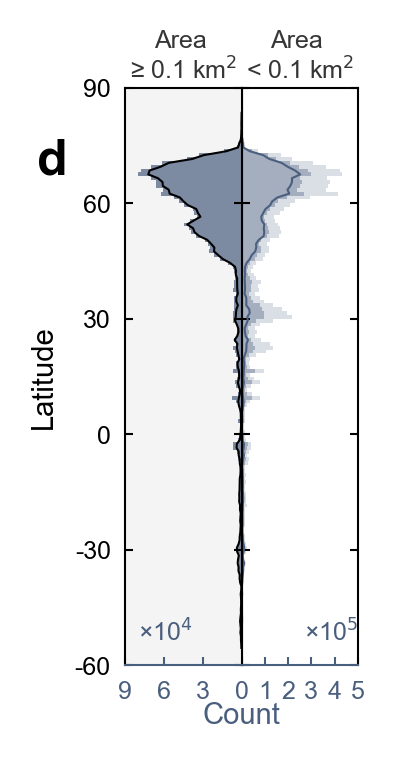

In [25]:
### e.纬度数量
label=['>0.1 km$^2$','0.01~0.1 km$^2$','0.005~0.01 km$^2$']
savepic=os.path.join(fig_path,'Figure9 d.png')
fig=plt.figure(figsize=(1,2.5),dpi=300)#fig=plt.figure(figsize=(18,7.9))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1],wspace =0)

ax1=plt.subplot(gs[0, 1],)
s=5
hu_a_lt1=Lat_data['hu_c1'].values/(10.0**s)
hu_a_bt1_10=Lat_data['hu_c10'].values/(10.0**s)
pld_a_bt1_10=Lat_data['pld_c10'].values/(10.0**s)
s1=ax1.barh(latitude+0.5,left=hu_a_bt1_10,width=hu_a_lt1, color=hu_c_color,height=1,alpha=alpha[2],label=label[2])
s2=ax1.barh(latitude+0.5,hu_a_bt1_10, color=hu_c_color,height=1,alpha=alpha[1],label=label[1])
# ax1.barh(latitude+0.5,pld_a_bt1_10,color=red_color[0],height=1,alpha=alpha[1],label=label[1])
s4=ax1.plot(pld_a_bt1_10,latitude+0.5,color=color_list[-2],linewidth=0.5,label=label[1])

plt.tick_params(bottom=True, top=False, left=True, right=True )
plt.tick_params(labelbottom=True,labeltop=False,labelleft=False, labelright=False)

ax1.set_xlim(0,5)
ax1.set_xticks(range(0,6,1))
ax1.text(5,-55,f'×10$^{s}$',ha='right',va='bottom',color=hu_c_color,fontsize=6)

ax1.text(2.5,91,'Area \n< 0.1 km$^2$',ha='center',va='bottom',color=color_gt10,fontsize=6)
ax11=plt.subplot(gs[0, 0],)
ax11.text(-13.5,65,sub_fig_name[3],fontsize=12,ha='right',va='bottom',weight='bold')
# ax11.set_xlabel('Count')

s=4
hu_a_gt10=Lat_data['hu_c_gt10'].values/(10.0**s)
pld_a_gt10=Lat_data['pld_c_gt10'].values/(10.0**s)
s3=ax11.barh(latitude+0.5,-hu_a_gt10, color=hu_c_color,height=1,alpha=alpha[0],label=label[0])
# ax11.barh(latitude+0.5,-pld_a_gt10,color=red_color_list[1],height=1,alpha=alpha[0],label=label[0])
s5=ax11.plot(-pld_a_gt10,latitude+0.5,color='k',linewidth=0.5,label=label[0])
ax11.set_xlim(-9,0)
ax11.set_xticks(range(-9,0,3))
ax11.set_xticklabels([9,6,3])
for ax in [ax1,ax11]:
    ax.set_ylim(-60,90)
    ax.set_yticks(range(-60,91,30))
    ax.spines['bottom'].set_color(hu_c_color) 
    ax.tick_params(axis='y',width=0.5,length=2)
    ax.tick_params(axis='x',width=0.5,length=2,color=hu_c_color)
    for label in ax.get_xticklabels():
        label.set_color(hu_c_color)
        label.set_fontsize(6)
    for label in ax.get_yticklabels():
        label.set_fontsize(6)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

plt.tick_params(bottom=True, top=False, left=True, right=True )
plt.tick_params(labelbottom=True,labeltop=False,labelleft=True, labelright=False)

# ax11.set_xticklabels([])
ax11.set_facecolor('#f4f4f4')
# ax1.legend(loc=[1.02,0],frameon=False)
# ax11.legend(loc=[1.02,0.1],frameon=False)
ax11.set_ylabel('Latitude')
ax11.text(-8,-55,f'×10$^{s}$',ha='left',va='bottom', color=hu_c_color,fontsize=6)
ax11.text(0,-75,'Count',color=hu_c_color,ha='center')
ax11.text(-4.5,91,'Area \n≥ 0.1 km$^2$',ha='center',va='bottom',color=color_gt10,fontsize=6)
plt.savefig(savepic,dpi=400,bbox_inches='tight')#,dpi=400
plt.show()